In [9]:
import json
import pandas as pd
import C2Analyse

In [14]:
df_athletes = C2Analyse.load_C2scrape_data("output/C2Athletes.json")
df_athletes.index.set_names("profile_id", inplace=True)
df_extended = C2Analyse.load_C2scrape_data("output/C2Extended.json")
df_extended.index.set_names("workout_id", inplace=True)
df_workouts = C2Analyse.load_C2scrape_data("output/C2Workouts.json")
df_workouts.index.set_names("workout_id", inplace=True)

In [15]:
print(df_athletes)

                         name availablity age         country        location  \
profile_id                                                                      
1157105        Benjamin Smith   available  32       Australia   Brisbane, QLD   
1120032            Jasper Liu   available  26   United States             NaN   
451524             Chris Gray   available  29   United States     Raleigh, NC   
1301914     Frederick Hancock   available  19  United Kingdom             NaN   
1189208           Itai Almogy   available  19   United States             NaN   
...                       ...         ...  ..             ...             ...   
1250363             John Oney   available  23   United States   Greenwich, OH   
737313            Alan Aikens   available  54   United States  Dorchester, MA   
1210804          George Watts   available  41   United States              UT   
1083487         Amir Mishriky   available  43           Egypt           Cairo   
1039194          HELIN GERAR

In [16]:
print(df_extended)

             age    gender weight class          country verified  \
workout_id                                                          
45106891     18      Male          Lwt     United States      Yes   
51182039     42      Male          Lwt     United States      Yes   
51157298     32      Male          Lwt         Australia      Yes   
50803540     24      Male          Lwt            France      Yes   
49949686     19      Male          Lwt    United Kingdom      Yes   
...          ...       ...          ...              ...      ...   
34619955     55    Female           NaN   United Kingdom       No   
34898628     52    Female           NaN           Norway       No   
35443299     22    Female           NaN    United States       No   
34790536     27    Female           NaN    United States      Yes   
35223315     36    Female           NaN          Belgium       No   

                     type      time distance     pace  \
workout_id                                   

In [17]:
print(df_workouts)

           pos.               name age           location country  \
workout_id                                                          
51157298      1     Benjamin Smith  32      Brisbane, QLD     AUS   
49949686      2  Frederick Hancock  19               None     GBR   
48271042      3         Jasper Liu  26               None     USA   
45106891      4        Itai Almogy  18               None     USA   
48223141      5         Chris Gray  29        Raleigh, NC     USA   
...         ...                ...  ..                ...     ...   
38060086     42      Steven Meador  63     Hershey 🇺🇸, PA     USA   
36865147      1      Kirsten Kline  30        Houston, TX     USA   
34894246      2        Katrin Jüch  42          Pattensen     GER   
33478889      3       Terry Laskey  64    Morrisville, VT     USA   
36343943      4           Fei Yuan  36  Fresh Meadows, NY     USA   

                                       club/affiliation distance verified  \
workout_id               

In [18]:
#get basic stats:

print(f"Number of workouts: {len(df_workouts)}")
print(f"Number of athletes: {len(df_athletes)}")
print(f"Number of extended workout data: {len(df_extended)}")

print("Indoor rowing machine, workouts by event:")
df_workouts_by_year_event = df_workouts[(df_workouts["rower"] == "rower") & (df_workouts["machine"] == "rower")][["event","year"]].value_counts()

print(df_workouts_by_year_event)
#need to convert years to columns

Number of workouts: 331944
Number of athletes: 81027
Number of extended workout data: 331747
Indoor rowing machine, workouts by event:
event   year
5000    2021    20350
2000    2021    18794
        2020    16457
5000    2020    15565
10000   2021    15163
2000    2019    15071
1000    2020    12796
30      2021    12668
5000    2019    12346
1000    2021    11007
10000   2020    10657
1000    2019    10556
30      2020    10468
500     2021     8749
        2020     8604
10000   2019     8436
30      2019     7659
500     2019     7061
6000    2021     6914
1       2021     6411
21097   2021     6239
6000    2020     5302
60      2021     5200
100     2021     4398
21097   2020     4144
60      2020     3874
6000    2019     3294
100     2020     3247
21097   2019     3225
60      2019     3043
100     2019     2797
1       2020     2680
4       2021     2636
1       2019     2473
4       2020     2355
42195   2021     1810
4       2019     1493
42195   2020     1265
        2019    

737603     97
991970     94
14340      90
940901     83
1134357    73
           ..
1438332     1
34212       1
1363300     1
1236349     1
1370969     1
Name: profile_id, Length: 81027, dtype: int64


<AxesSubplot:ylabel='Frequency'>

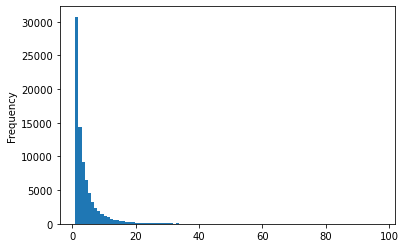

In [28]:
df_athletes_workouts = pd.merge(left=df_workouts, right=df_athletes, left_on='profile_id', right_on="profile_id", right_index=True)

#why are there less rows than workouts? Did we fail to get some athlete profiles? Can do an outer merge to find ones with empty profile data and check. Maybe profiles deleted xmax=20 xticks=range(0,xmax,2)

df_count = df_athletes_workouts["profile_id"].value_counts()
print(df_count)

bins = df_count[0].max()

df_count.plot(kind="hist", bins=bins)